In [1]:
adult = read.csv("C:\\Users\\student\\Documents\\Statistical Analysis using R\\Assignment 10\\adult.csv", header = FALSE)
library(caret)
library(ggplot2)
library(rpart)
library(rattle)
library(randomForest)

Loading required package: lattice
Loading required package: ggplot2
Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:rattle':

    importance

The following object is masked from 'package:ggplot2':

    margin



In [2]:
colnames(adult) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "country", "income")

In [3]:
missingValues = function(x) {
  missing = 0;
  for(i in 1:ncol(x)) {
    for(j in 1:nrow(x)) {
      if((x[j,i]=="NA")|(x[j,i]==" ?")|(x[j,i]==".")|(is.na(x[j,i]))|(x[j,i]=="?")|(is.na(x[j,i]))) {
        missing = missing + 1
      }
    }
  }
  return (missing)
}

In [4]:
replaceMissingValues = function(dataSet) {
  for(j in 1:ncol(dataSet)) {
    if(!is.numeric(dataSet[,j])) {
      levels(dataSet[,j])[levels(dataSet[,j])==" ?"]<-names(sort(table(dataSet[,j])))[1]
      levels(dataSet[,j])[levels(dataSet[,j])==" ."]<-names(sort(table(dataSet[,j])))[1]
      levels(dataSet[,j])[levels(dataSet[,j])==" NA"]<-names(sort(table(dataSet[,j])))[1]
    } else {
      dataSet[,j][is.na(dataSet[,j])]<-mean(dataSet[,j],na.rm=TRUE)
    }
  }
  return (dataSet)
}

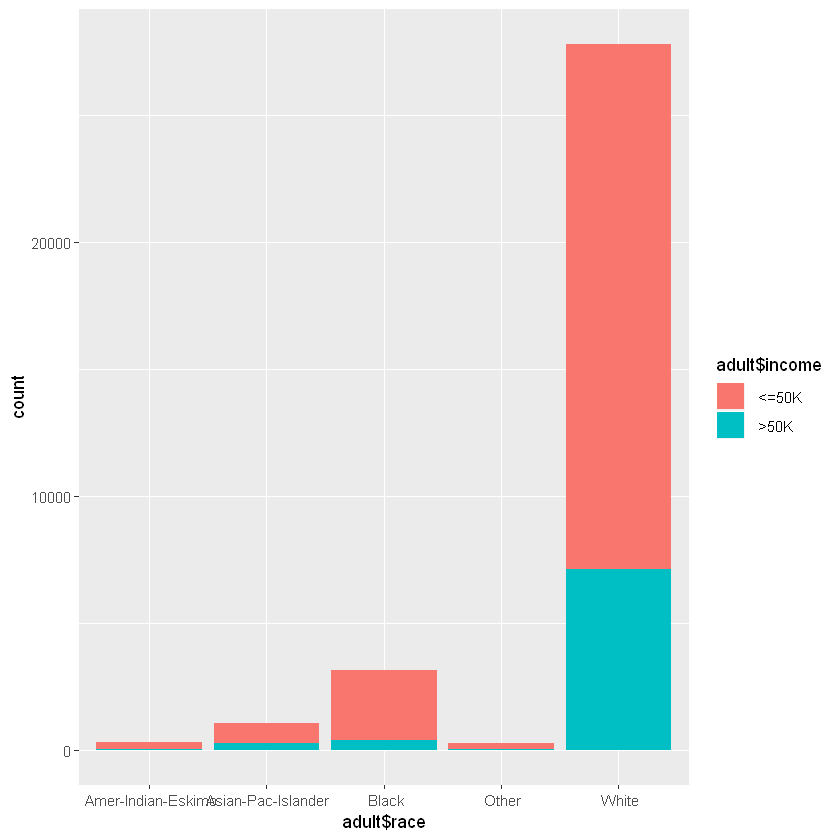

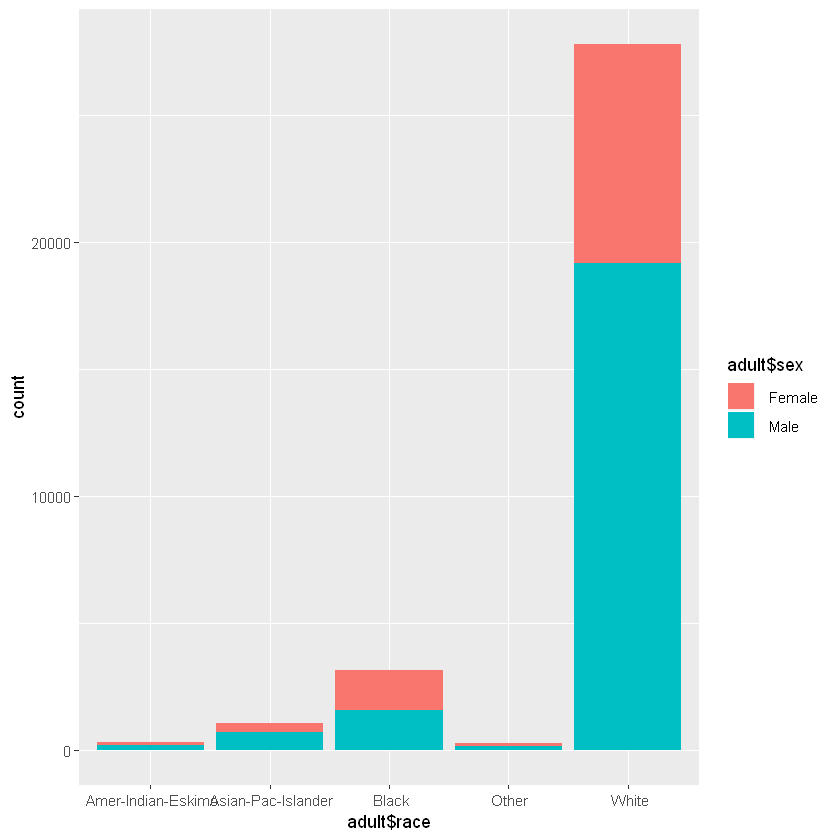

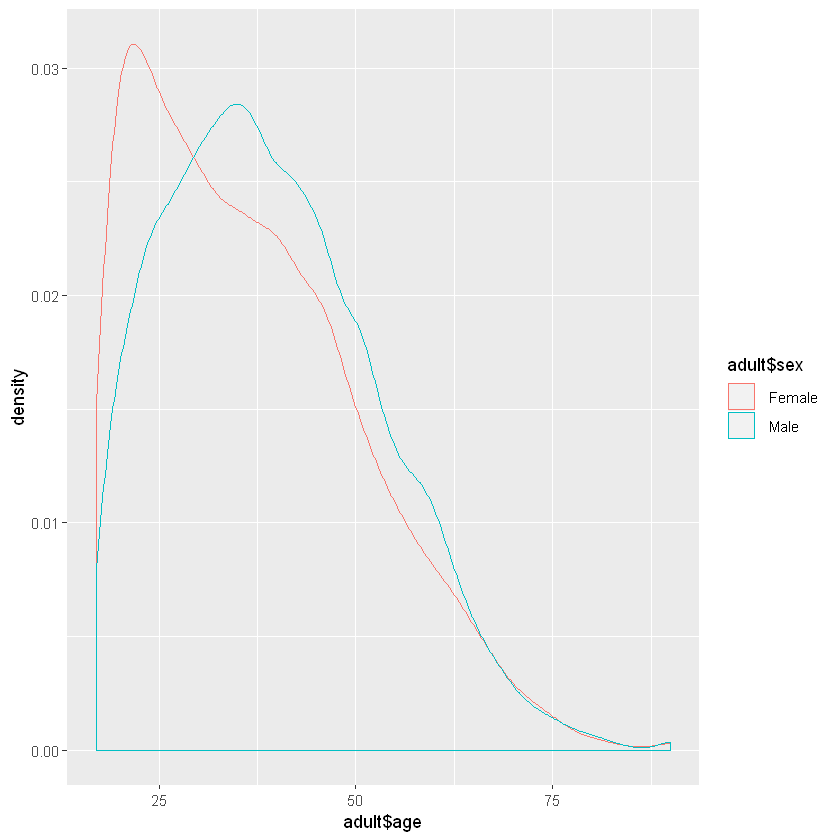

In [5]:
ggplot(adult, mapping = aes(x = adult$race, fill = adult$income), position = "dodge") + geom_bar()
ggplot(adult, mapping = aes(x = adult$race, fill = adult$sex), position = "dodge") + geom_bar()
ggplot(adult, mapping = aes(x = adult$age, color = adult$sex)) + geom_density()

In [6]:
#income is the target variable
names(adult)[15] = "income"
splitIndex <- createDataPartition(adult$income, p = 0.60, list = FALSE, times = 1)
trainData <- adult[splitIndex,]
test <- adult[-splitIndex,]

In [7]:
mytree <- rpart(income ~ ., data = trainData, method = "class")
pred <- predict(mytree, test, type = "class")

In [8]:
cm=confusionMatrix(data = pred, reference = test$income, positive = " >50K")
cm[[3]]

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  8.460534e-01   5.257009e-01   8.397397e-01   8.522121e-01   7.592138e-01 
AccuracyPValue  McnemarPValue 
 3.854565e-131  4.373563e-117

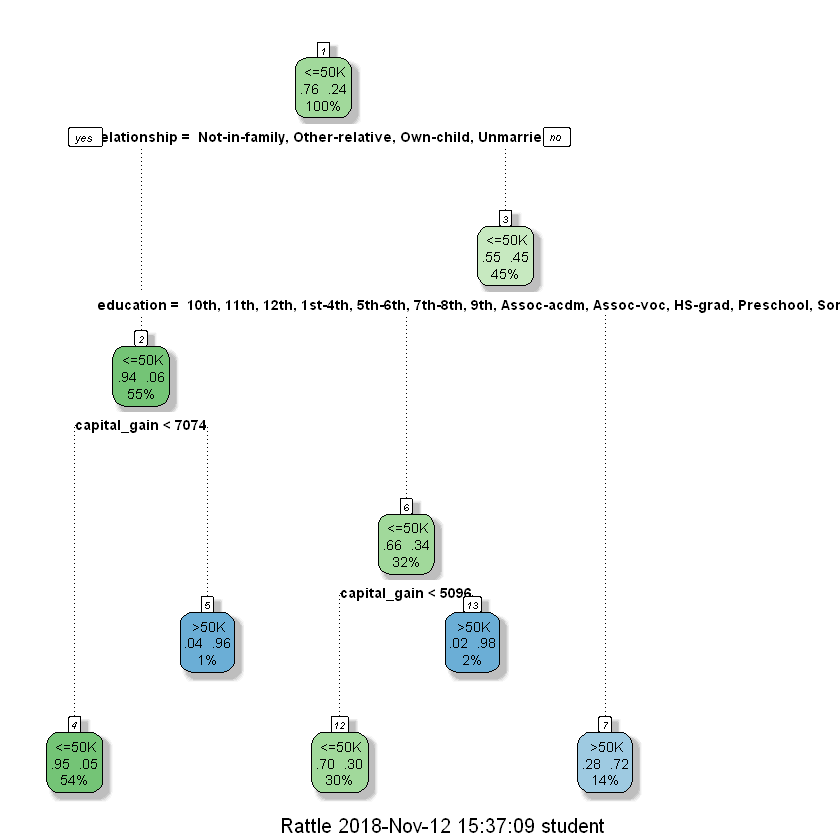

In [9]:
fancyRpartPlot(mytree)

In [10]:
model <- train(income~., data=trainData, method="rpart")
pred2=predict(model,test)

cm2=confusionMatrix(pred2, test$income, positive=" >50K")

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  8.428542e-01   5.164965e-01   8.354837e-01   8.500197e-01   7.592138e-01 
AccuracyPValue  McnemarPValue 
  1.684375e-91   1.093440e-84

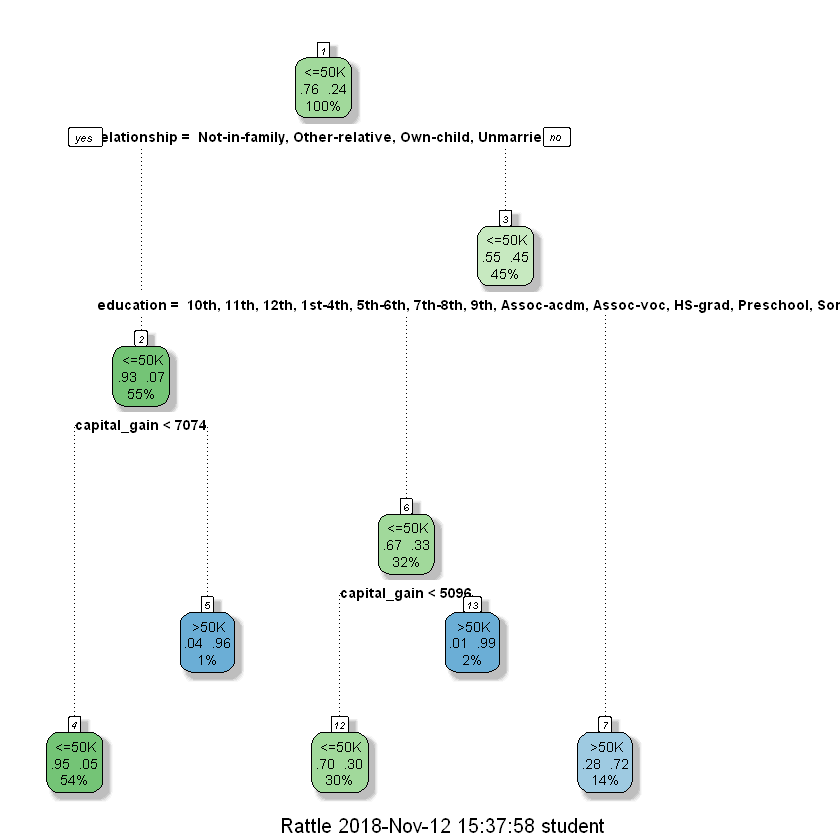

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  8.450553e-01   5.236188e-01   8.360356e-01   8.537647e-01   7.592138e-01 
AccuracyPValue  McnemarPValue 
  4.807214e-65   3.948604e-57

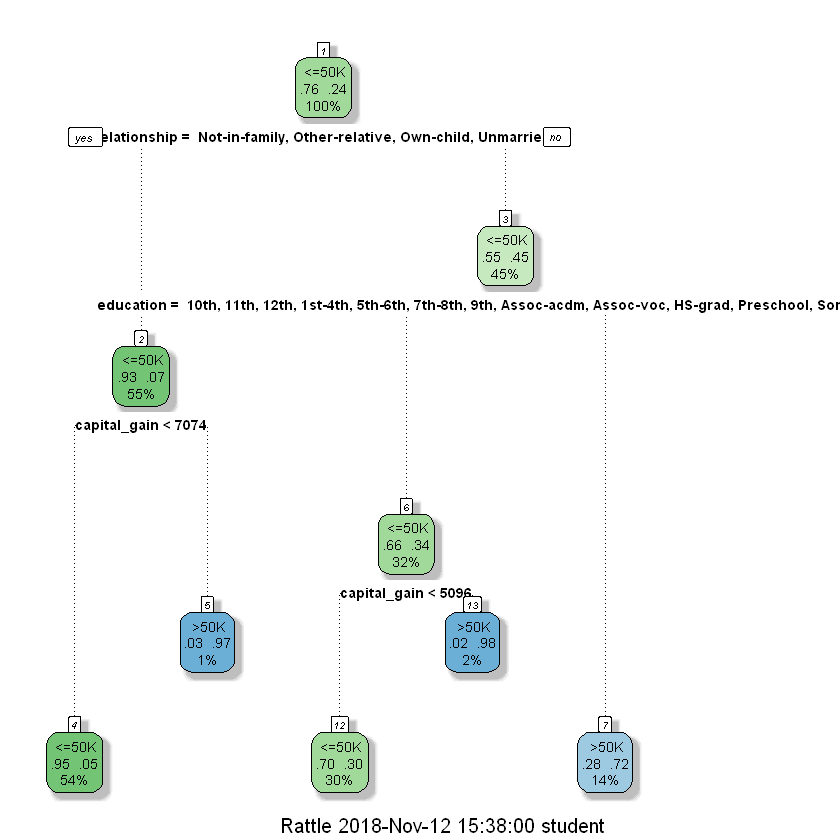

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  8.427518e-01   5.159444e-01   8.297874e-01   8.550973e-01   7.592138e-01 
AccuracyPValue  McnemarPValue 
  1.021332e-31   1.855908e-29

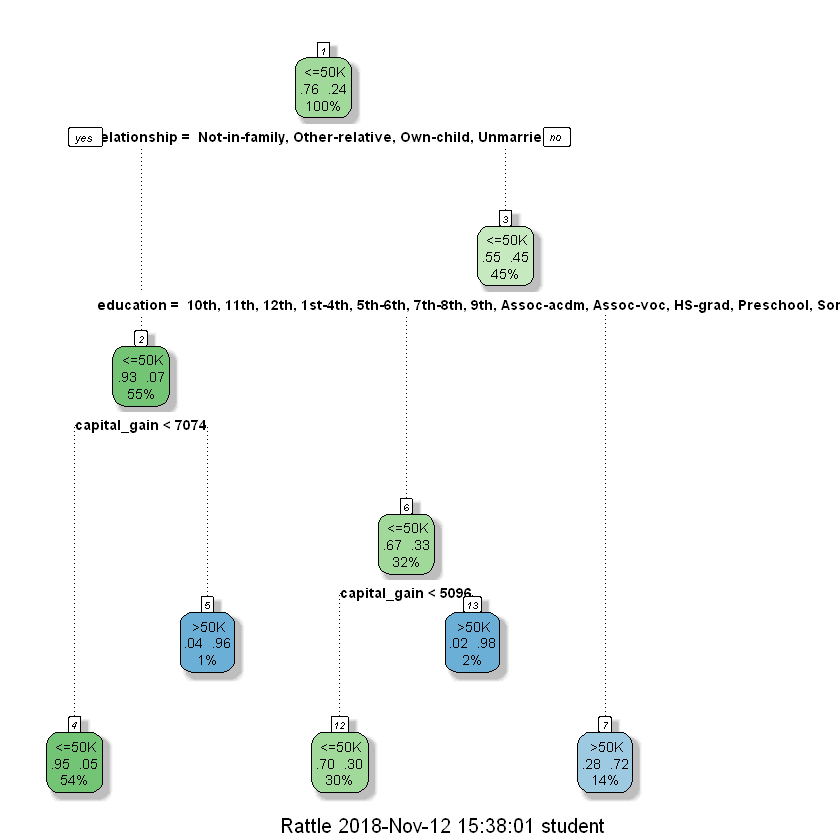

In [11]:
cm=NULL
automate = function(dataFrame, prob) {
  #Part 7
  names(dataFrame)[15] = "income"
  splitIndex <- createDataPartition(adult$income, p = prob, list = FALSE, times = 1)
  trainData <- adult[splitIndex,]
  test <- adult[-splitIndex,]
  
  #Part 8
  mytree <- rpart(income ~ ., data = trainData, method = "class")
  pred <- predict(mytree, test, type = "class")
  
  #Part 9
  cm=confusionMatrix(data = pred, reference = test$income, positive = " >50K")
  cm[[3]]
  
  #Part 10
  fancyRpartPlot(mytree)
  return (cm)
}
cm<-automate(adult, 0.7)
cm[[3]]
cm<-automate(adult, 0.8)
cm[[3]]
cm<-automate(adult, 0.9)
cm[[3]]